In [1]:
# 需的套件

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#將資料匯入

train = pd.read_csv('train_values.csv')
label = pd.read_csv('train_labels.csv')

category = ['information_and_communication_technologies', 'governance',
       'urban_development', 'law_and_development', 'public_sector_development',
       'agriculture', 'communities_and_human_settlements',
       'health_and_nutrition_and_population', 'culture_and_development',
       'environment', 'social_protections_and_labor', 'industry',
       'macroeconomics_and_economic_growth',
       'international_economics_and_trade', 'conflict_and_development',
       'finance_and_financial_sector_development',
       'science_and_technology_development', 'rural_development',
       'poverty_reduction', 'private_sector_development', 'informatics',
       'energy', 'social_development', 'water_resources', 'education',
       'transport', 'water_supply_and_sanitation', 'gender',
       'infrastructure_economics_and_finance']
label.keys()
#train.keys()

Index(['row_id', 'information_and_communication_technologies', 'governance',
       'urban_development', 'law_and_development', 'public_sector_development',
       'agriculture', 'communities_and_human_settlements',
       'health_and_nutrition_and_population', 'culture_and_development',
       'environment', 'social_protections_and_labor', 'industry',
       'macroeconomics_and_economic_growth',
       'international_economics_and_trade', 'conflict_and_development',
       'finance_and_financial_sector_development',
       'science_and_technology_development', 'rural_development',
       'poverty_reduction', 'private_sector_development', 'informatics',
       'energy', 'social_development', 'water_resources', 'education',
       'transport', 'water_supply_and_sanitation', 'gender',
       'infrastructure_economics_and_finance'],
      dtype='object')

In [3]:
# 檢查資料
print(train.shape)
print(label.shape)

(18830, 2)
(18830, 30)


In [4]:
#pd.merge?

In [5]:
# 合併兩個資料 train , label
#pandas.merge
total = train.merge(label, left_on='row_id', right_on='row_id',  how='inner')
print(total.shape)
total[:3]

(18830, 31)


,row_id,doc_text,information_and_communication_technologies,governance,urban_development,law_and_development,public_sector_development,agriculture,communities_and_human_settlements,health_and_nutrition_and_population,...,private_sector_development,informatics,energy,social_development,water_resources,education,transport,water_supply_and_sanitation,gender,infrastructure_economics_and_finance
0,0,"For more information, visit http://www.wor...",0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,...,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# 分析文章的字數 分布
len(total.loc[0,'doc_text'])

19782

In [7]:
# 我要找所有18830文章中的字數 然後要畫圖
word = lambda x: len(x)
#word('abcdefg')
words = total.loc[:,'doc_text'].apply(word)
print(type(words))
words[:10]

<class 'pandas.core.series.Series'>


0    19782
1    19790
2    19642
3    19665
4    19703
5    19714
6    18084
7    19639
8    19752
9    19560
Name: doc_text, dtype: int64

In [8]:
# 數字分析
sorted(words, reverse=False)[:20]

# 請幫忙找出那些字數 少於10字 的row_id 與其文章內容
words[np.where( words <=10 , True, False)]

# 找出完整資料列 發現空內容 竟然有 分類
total[np.where( words <=10 , True, False)]


,row_id,doc_text,information_and_communication_technologies,governance,urban_development,law_and_development,public_sector_development,agriculture,communities_and_human_settlements,health_and_nutrition_and_population,...,private_sector_development,informatics,energy,social_development,water_resources,education,transport,water_supply_and_sanitation,gender,infrastructure_economics_and_finance
1494,1494,92858\n,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3803,3803,37574\n\n\n,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4940,4940,36833\n\n\n\n\n,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5078,5078,73732\n,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6470,6470,83924\n,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7232,7232,49092\n\n\n\n\n,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8292,8292,63227\n,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8610,8610,66364\n,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8775,8775,38452\n\n,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
11345,11345,64577\n,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0


(18830,)


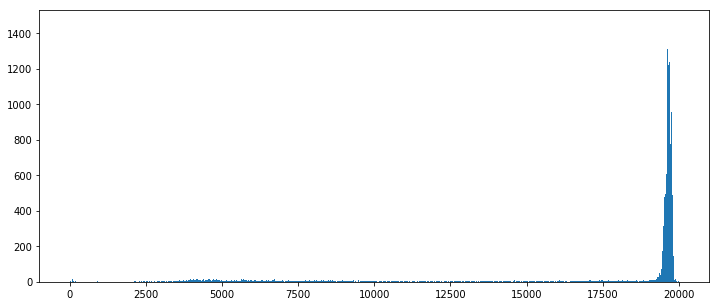

In [9]:
print(words.shape)

plt.figure( figsize=(12,5) )
plt.hist(words, bins = 'auto')
plt.show()

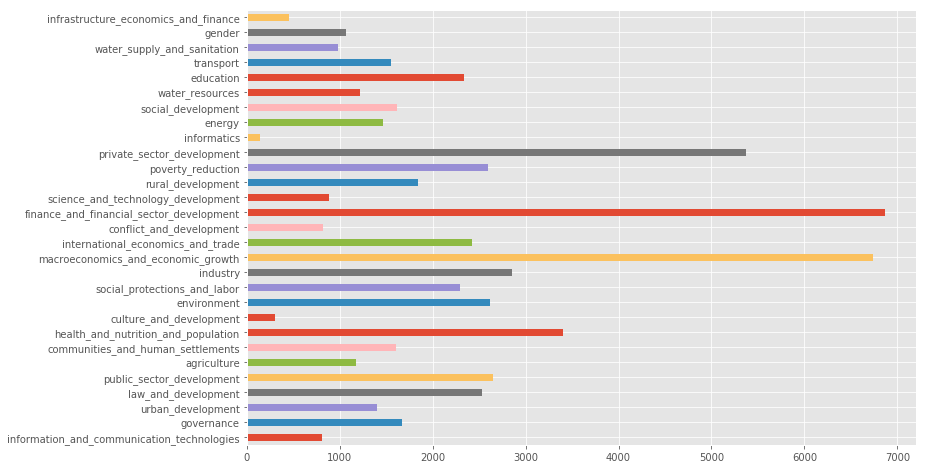

In [10]:
# 根據類別畫出多少文章
plt.style.use('ggplot')
plt.figure( figsize=(12,8) )
dist = np.sum(label[category], axis=0)
dist.plot(kind='barh')
plt.show()

In [11]:
np.sum(label[category], axis=0)

information_and_communication_technologies     810
governance                                    1669
urban_development                             1397
law_and_development                           2527
public_sector_development                     2652
agriculture                                   1176
communities_and_human_settlements             1609
health_and_nutrition_and_population           3403
culture_and_development                        308
environment                                   2615
social_protections_and_labor                  2292
industry                                      2859
macroeconomics_and_economic_growth            6737
international_economics_and_trade             2427
conflict_and_development                       820
finance_and_financial_sector_development      6863
science_and_technology_development             881
rural_development                             1840
poverty_reduction                             2592
private_sector_development     

In [12]:
label[category]

,information_and_communication_technologies,governance,urban_development,law_and_development,public_sector_development,agriculture,communities_and_human_settlements,health_and_nutrition_and_population,culture_and_development,environment,...,private_sector_development,informatics,energy,social_development,water_resources,education,transport,water_supply_and_sanitation,gender,infrastructure_economics_and_finance
0,0,1,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
